In [1]:
#morphology
import cv2
import  matplotlib.pyplot as plt
import skimage as ski
import numpy as np
from img_util import imshow

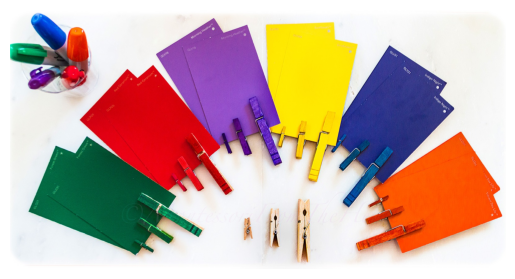

In [2]:
img=cv2.imread('colour.jpg')
imshow(img[:,:,::-1],'')

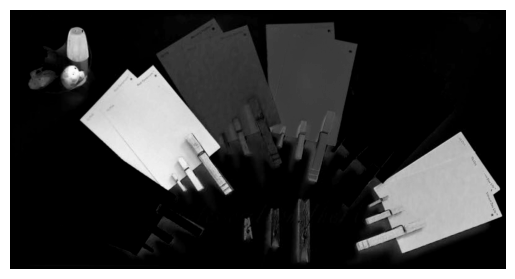

In [3]:
red_img=cv2.subtract(
    img[:,:,-1], cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
)
imshow(red_img,'','gray')

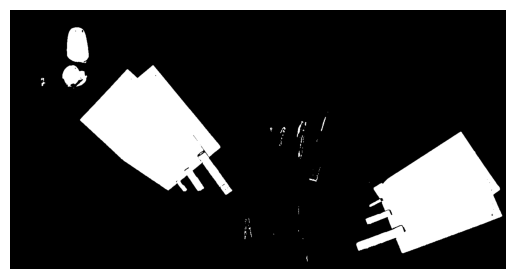

In [4]:
_, red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [5]:
strel=cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

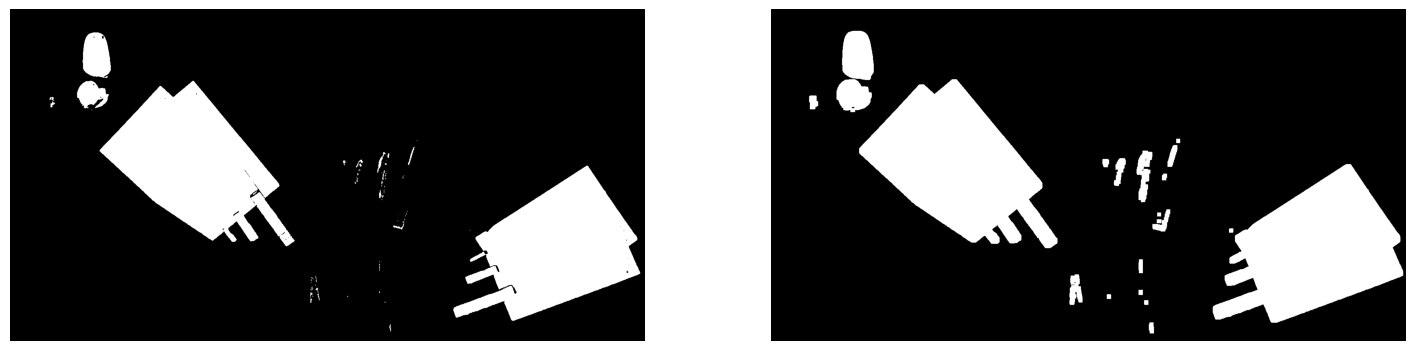

In [6]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_dilate=cv2.dilate(red_bw,strel)
imshow(red_dilate,'','gray')

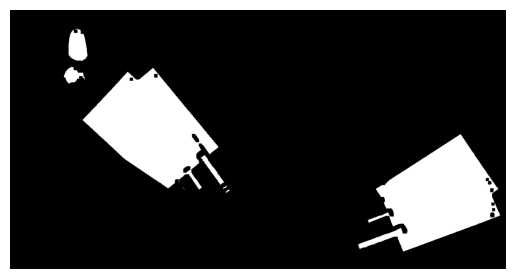

In [7]:
red_erode=cv2.erode(red_bw,strel)
imshow(red_erode,'','gray')

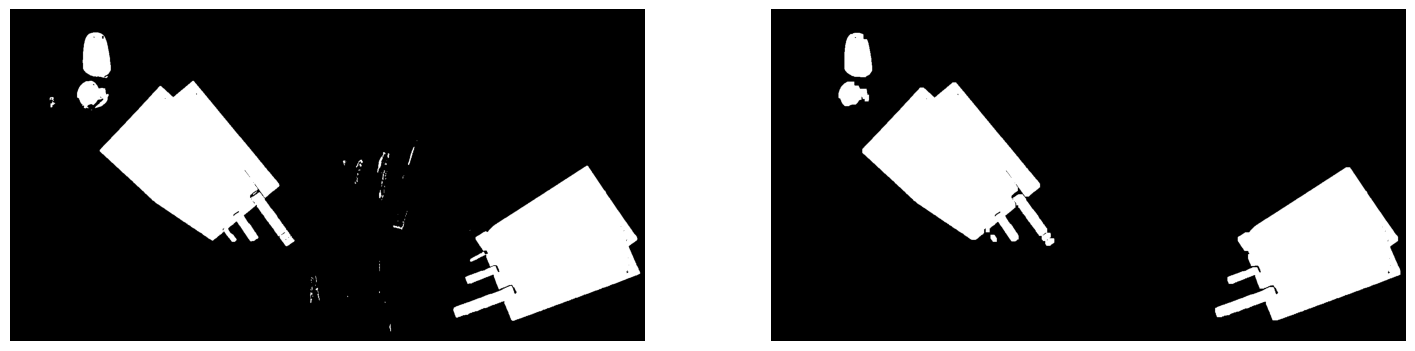

In [8]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_open=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_open,'','gray')

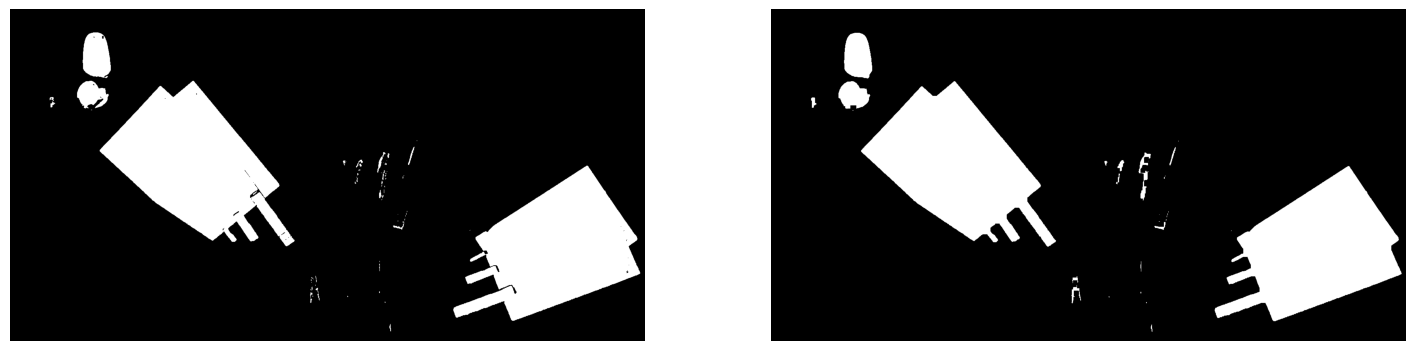

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_close=cv2.morphologyEx(red_bw,cv2.MORPH_CLOSE,strel,iterations=1)
imshow(red_close,'','gray')

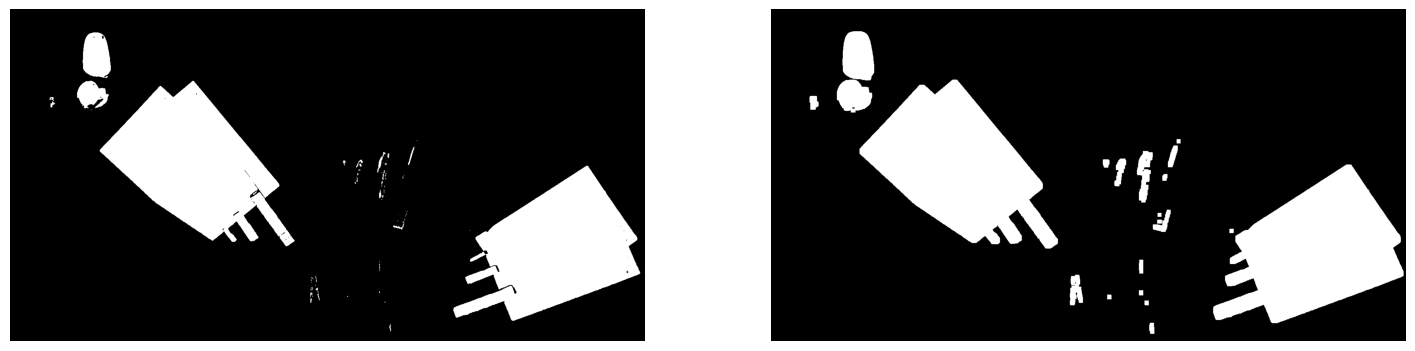

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close2,'','gray')

In [11]:
help(ski.morphology.remove_small_objects)

Help on function remove_small_objects in module skimage.morphology.misc:

remove_small_objects(ar, min_size=64, connectivity=1, *, out=None)
    Remove objects smaller than the specified size.
    
    Expects ar to be an array with labeled objects, and removes objects
    smaller than min_size. If `ar` is bool, the image is first labeled.
    This leads to potentially different behavior for bool and 0-and-1
    arrays.
    
    Parameters
    ----------
    ar : ndarray (arbitrary shape, int or bool type)
        The array containing the objects of interest. If the array type is
        int, the ints must be non-negative.
    min_size : int, optional (default: 64)
        The smallest allowable object size.
    connectivity : int, {1, 2, ..., ar.ndim}, optional (default: 1)
        The connectivity defining the neighborhood of a pixel. Used during
        labelling if `ar` is bool.
    out : ndarray
        Array of the same shape as `ar`, into which the output is
        placed. By d

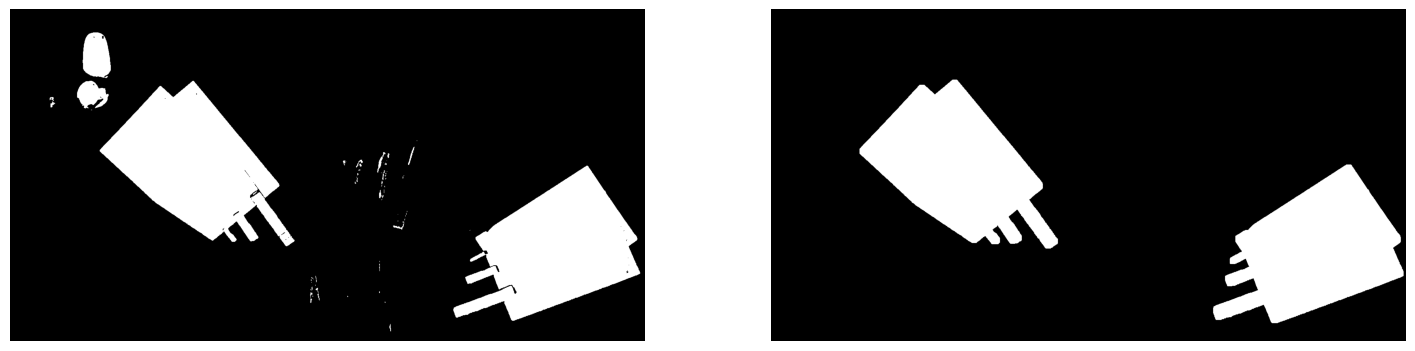

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
imshow(red_close3,'','gray')

In [13]:
rp=ski.measure.regionprops(ski.measure.label
                           (red_close3.astype('uint8')
                            )
                    )
rp

In [14]:
ski.measure.label(red_close3.astype('uint8')
                  ).max()

2

In [15]:
(red_close3.astype('uint8')*255).max()

255

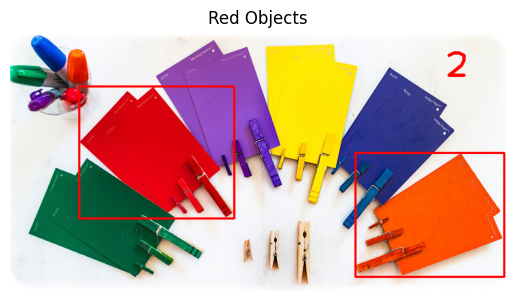

In [19]:
#summary
img=cv2.imread('colour.jpg')
red_img=cv2.subtract(img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
strel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
red_dilate=cv2.dilate(red_bw,strel)
red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_CLOSE,strel,iterations=1)
red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
rp=ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))

img_copy=img.copy()
for r in rp:
    y1,x1,y2,x2=r.bbox
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
count=str(len(rp))
cv2.putText(img_copy,count,(img_copy.shape[1]-200,150),  #moving toward the columns
            cv2.FONT_HERSHEY_PLAIN,8,(0,0,255),thickness=10) #8 is the font size  
imshow(img_copy[:,:,::-1],'Red Objects')

In [20]:
vid=cv2.VideoCapture(0) #accessing the camera of the computer
while True:

    ack,im=vid.read()
    if ack:
        red_img=cv2.subtract(
            img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        )
    _,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
    strel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
    red_dilate=cv2.dilate(red_bw,strel)
    red_close2=cv2.morphologyEx(
        red_dilate,cv2.MORPH_CLOSE,strel,iterations=1
        )
    red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),1500)
    rp=ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
    img_copy=img.copy()
    for r in rp:
        y1,x1,y2,x2=r.bbox
        cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
    count=str(len(rp))
    cv2.putText(img_copy,count,(img_copy.shape[1]-250,150),cv2.FONT_HERSHEY_PLAIN,10,(0,0,255),thickness=10)
    cv2.imshow('preview',im)
    key=cv2.waitKey(1)
    if key==ord('x'):
        break
       
cv2.destroyAllWindows()
vid.release()
       